### The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [2]:
cd Data/

C:\Users\Dibyaranjan\JUPYTER\Data


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['figure.dpi'] = 80

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_train = pd.read_csv('cancer_classification.csv')

In [22]:
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0


In [21]:
df_train['target'] = df_train['benign_0__mal_1']

In [9]:
target_count = df_train.benign_0__mal_1.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')



Class 0: 212
Class 1: 357
Proportion: 0.59 : 1


Class 0: 212
Class 1: 357


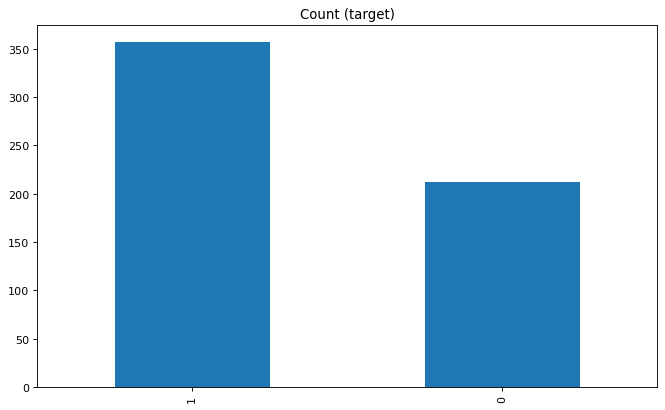

In [12]:
target_count = df_train.benign_0__mal_1.value_counts()
target_count.plot(kind='bar', title='Count (benign_0__mal_1)');
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

# Under Sampling

In [13]:
df_train.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [14]:
# Class count
count_class_1, count_class_0 = df_train.target.value_counts()

In [15]:
# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

Random Under-sampling:
1    357
0    357
Name: target, dtype: int64


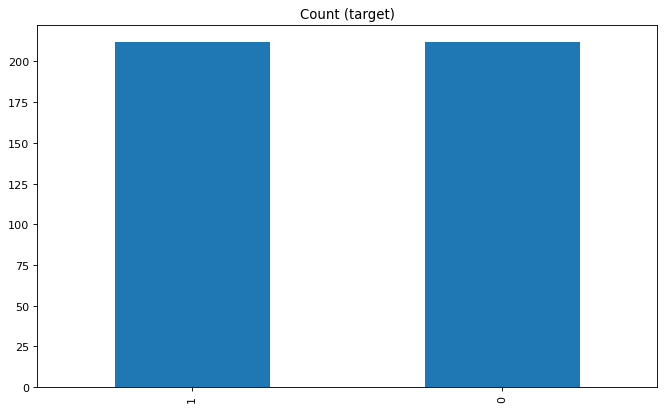

In [32]:
df_class_1_under = df_class_1.sample(count_class_1)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random Under-sampling:')
print(df_test_over.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [20]:
df_class_0.sample(count_class_1,replace=True)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1,target
180,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,220.80,3216.0,0.1472,0.4034,0.5340,0.26880,0.2856,0.08082,0,0
257,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,...,119.80,928.8,0.1765,0.4503,0.4429,0.22290,0.3258,0.11910,0,0
126,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.06130,...,113.20,848.7,0.1471,0.2884,0.3796,0.13290,0.3470,0.07900,0,0
177,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,123.50,981.2,0.1415,0.4667,0.5862,0.20350,0.3054,0.09519,0,0
214,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,...,115.00,811.3,0.1559,0.4059,0.3744,0.17720,0.4724,0.10260,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,106.00,788.0,0.1794,0.3966,0.3381,0.15210,0.3651,0.11830,0,0
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,92.04,653.6,0.1419,0.1523,0.2177,0.09331,0.2829,0.08067,0,0
499,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999,0,0
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,119.10,959.5,0.1640,0.6247,0.6922,0.17850,0.2844,0.11320,0,0


# Random Over-Sampling

In [23]:
df_test_over

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,16.260,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.079810,0.1869,0.06532,...,113.70,975.2,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953,0,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0,0
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.081230,0.2027,0.06758,...,115.70,985.5,0.13680,0.42900,0.35870,0.18340,0.3698,0.10940,0,0
85,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.087950,0.2132,0.06022,...,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579,0,0


In [17]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

Random over-sampling:
1    357
0    357
Name: target, dtype: int64


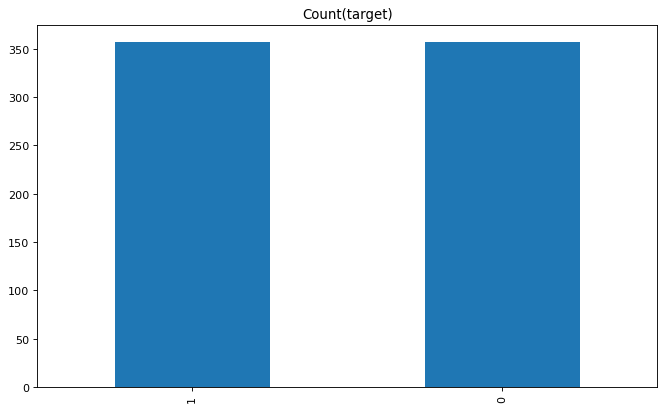

In [25]:
print('Random over-sampling:')
print(df_test_over.target.value_counts())
df_test_over.target.value_counts().plot(kind='bar', title='Count(target)');

## Over Sampling using Scikit Learn

To install the library use below line in your anaconda prompt

conda install -c conda-forge imbalanced-learn

In [10]:
import imblearn

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
os = RandomOverSampler(random_state=0)

In [15]:
from collections import Counter

In [20]:
Counter(df_train['benign_0__mal_1'])

Counter({0: 212, 1: 357})

In [26]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
df_0 = df_train[df_train.target==0]
df_1 = df_train[df_train.target==1]

In [36]:
df_0['target'].value_counts()

0    212
Name: target, dtype: int64

In [38]:
df_1['target'].value_counts()

1    357
Name: target, dtype: int64